# Prueba de Pathfinding para Wheelliam
### Prototipo de algoritmo de pathfinding a base a una imagen con todos sus pixeles blancos o negros, para ser aplicado en el proyecto curricular 'Wheelliam', de la especialidad TIC del colegio ORT Belgrano

### Importo las librerias necesarias para facilitar la construccion del algoritmo

In [4]:
import numpy as np # numpy para las operaciones con matrices, en este caso las imagenes 
import matplotlib.pyplot as plt # matplotlib para visualizar la imagen
import cv2 # OpenCV para manipular y visualizar la imagen

# Importamos la libreria que implementa una eficiente version del algoritmo de pathfinding A*
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid 
from pathfinding.finder.a_star import AStarFinder

### Subo, modifico, y muestro la imagen a analizar

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(420, 425)
<class 'numpy.ndarray'>


<function matplotlib.pyplot.show(close=None, block=None)>

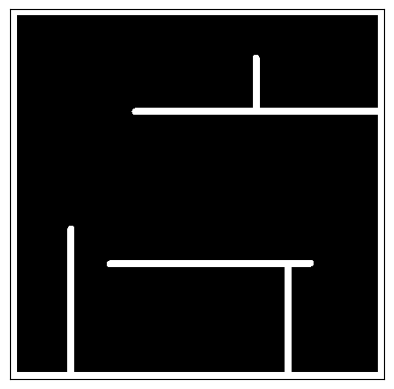

In [3]:
ogim = cv2.imread("example_map_binary.png") 
# Esta es la imagen original, es el primer indice de las llaves del diccionario 'uploaded',
# convertidas a lista, las llaves de ese diccionario son los nombres de los archivos subidos.

grayIm = cv2.cvtColor(ogim, cv2.COLOR_BGR2GRAY)
# Esta es la imagen convertida a escala de grises, se ve igual ya que sus pixeles ya son blancos o negros,
# pero se usan 1/3 de la informacion para representarla. Esto facilita enormemente la aplicacion del 

#cv2.imshow("GaryIm", grayIm)
print(grayIm)
print(grayIm.shape)
print(type(grayIm))

# Visualizamos la imagen en escala de grises, al igual que los valores de sus pizeles, su tipo, y su forma

plt.imshow(cv2.cvtColor(ogim, cv2.COLOR_BGR2RGB))
plt.tick_params(
    bottom=False,
    left=False,
    labelleft=False,
    labelbottom=False)
plt.show
# Mostramos la imagen original de forma alternativa con matplotlib, como se puede apreciar,
# es igual a la variacion, (el metodo 'plt.imshow' escala la imagen a ese tamaño por defecto)

### Adapto la imagen a un formato que el algoritmo comprenda

<class 'numpy.uint8'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<function matplotlib.pyplot.show(close=None, block=None)>

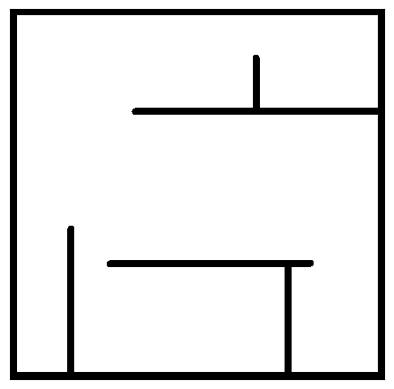

In [7]:
map = grayIm//255 # Normalizo la imagen para que sus valores sean 0 o 1, en otras palabras, si la casilla o pixel esta ocupada o no
map = np.uint8(map) # Represento el array como uint8 para utilizar la menor cantidad de memoria posible

# Invierto los colores de la imagen, este bucle for se puede comentar de no ser necesario dependiendo de la imagen. Esto se hace
# porque el algoritmo toma 1, (originalmente 255, (255,255,255), o blanco), como libre, y 0, (0,(0,0,0), negro), como ocupado,
# y la imagen utilizada en este ejemplo esta pensada a la inversa.
for i, row in enumerate(map): # Itero en la imagen normalizada 'map', (row), y sus indices, (i).
  for j, val in enumerate(row): # Itero en las tuplas que componen 'row', (val), y sus indices, (j). 
    if val == 1: # Si el valor es 1, cambiarlo a 0
      map[i][j] = 0
    else: # Sino, cambiarlo a 1
      map[i][j] = 1

# Visualizamos y efectivamente la imagen esta invertida
print(type(map[0][0]))
print(map)
#cv2.imshow("map", map*255) # Multiplicamos por 255 porque la imagen normalizada no puede ser mostrada normalmente

plt.imshow(cv2.cvtColor(map*255, cv2.COLOR_BGR2RGB))
plt.tick_params(
    bottom=False,
    left=False,
    labelleft=False,
    labelbottom=False)
plt.show


### Creamos y ejecutamos el algoritmo en si

In [8]:
# Esta es una simple matriz que se puede usar para probar el algoritmo, se debe comentar para usar con imagenes

# matrix = [[1,0,1],
#           [1,0,1],
#           [1,1,1]]
# grid = Grid(matrix = matrix)
# start = grid.node(0,0)
# end = grid.node(2,0)


# Creamos un objeto 'grid', un mapa que la libreria puede entender, en base a la matriz que recien se hizo en base a la imagen.
# Tambien marcamos el punto de inicio y fin, el algoritmo debe encontrar el mejor camino para llegar de un punto al otro.
grid = Grid(matrix=map)
start = grid.node(100, 100)
end = grid.node(100, 180)

# Creamos el objeto 'finder', el algortimo de pathfinding A* que importamos, le especificamos que no se mueva en diagonales para mayor simplicidad
finder = AStarFinder(diagonal_movement=DiagonalMovement.never)
path, runs = finder.find_path(start, end, grid)

# Mostramos los resultados
print('operations:', runs, 'path length:', len(path))
print(grid.grid_str(path=path, start=start, end=end))

operations: 81 path length: 81
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|#########################################################################################################################################################################################################################################################################################################################################################################################################################################|
|################################################################################################################

### Convertimos el output del algoritmo a instrucciones de 'Izquierda', 'Derecha', 'Arriba', 'Abajo', ( 'L', 'R', 'U', 'D' )

In [9]:
com = []
mov_x = False
mov_y = False
for i, coord in enumerate(path):
  # Itero en la lista 'path', siendo 'coord' tuplas de 2 enteros marcando las coordenadas del camino, e 'i' el indice del elemento en la lista
  if coord == path[0]:
    com.append('S') # Si la coordenada es la primera de la lista la marco como el inicio en la nueva lista
  else:
    if coord == path[-1]:
      com.append('E') # Si es la ultima la marco como el fin del camino y salgo del loop
      break
    if coord[0] == path[i-1][0]: # Si la coordenada X del elemento actual es igual a la del anterior sabemos que no nos movemos en el eje x en este paso
      mov_x = False
    else:
      mov_x = True # Sino sabemos que si
    if coord[1] == path[i-1][1]: # Lo mismo para el eje Y
      mov_y = False
    else:
      mov_y = True
    if mov_y and coord[1] > path[i-1][1]: # Si nos movemos en el eje Y, y la coordenada Y del punto actual es mayor a la del anterior, nos movemos hacia abajo en el eje Y ya que el grafico de la lista es positivo hacia abajo
      com.append('D')
    elif mov_y and coord[1] < path[i-1][1]: # Si la condicion opuesta se cumple, nos movemos hacia arriba
      com.append('U')
    elif mov_x and coord[0] < path[i-1][0]: # Si nos movemos en el eje X, y la coordenada X del punto actual es menor a la del anterior, nos movemos hacia la izquierda en el eje X ya que el grafico de la lista es positivo hacia la derecha
      com.append('L') 
    elif mov_x and coord[0] > path[i-1][0]: # Si la condicion opuesta se cumple, nos movemos hacia la derecha
      com.append('R')

In [ ]:
import numpy as np # numpy para las operaciones con matrices, en este caso las imagenes 
import cv2 # OpenCV para manipular y visualizar la imagen

from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid 
from pathfinding.finder.a_star import AStarFinder

ogim = cv2.imread("example_map_binary.png") 
# Esta es la imagen original, es el primer indice de las llaves del diccionario 'uploaded',
# convertidas a lista, las llaves de ese diccionario son los nombres de los archivos subidos.

grayIm = cv2.cvtColor(ogim, cv2.COLOR_BGR2GRAY)
# Esta es la imagen convertida a escala de grises, se ve igual ya que sus pixeles ya son blancos o negros,
# pero se usan 1/3 de la informacion para representarla. Esto facilita enormemente la aplicacion del 

map = grayIm//255 # Normalizo la imagen para que sus valores sean 0 o 1, en otras palabras, si la casilla o pixel esta ocupada o no
map = np.uint8(map) # Represento el array como uint8 para utilizar la menor cantidad de memoria posible

# Creamos un objeto 'grid', un mapa que la libreria puede entender, en base a la matriz que recien se hizo en base a la imagen.
# Tambien marcamos el punto de inicio y fin, el algoritmo debe encontrar el mejor camino para llegar de un punto al otro.
grid = Grid(matrix=map)

# Creamos el objeto 'finder', el algortimo de pathfinding A* que importamos, le especificamos que no se mueva en diagonales para mayor simplicidad
finder = AStarFinder(diagonal_movement=DiagonalMovement.never)

def pathfinding(start, end):

  path, runs = finder.find_path(start, end, grid)

  # Mostramos los resultados
  print('operations:', runs, 'path length:', len(path))
  print(grid.grid_str(path=path, start=start, end=end))

  com = []
  mov_x = False
  mov_y = False
  for i, coord in enumerate(path):
    # Itero en la lista 'path', siendo 'coord' tuplas de 2 enteros marcando las coordenadas del camino, e 'i' el indice del elemento en la lista
    if coord == path[0]:
      com.append('S') # Si la coordenada es la primera de la lista la marco como el inicio en la nueva lista
    else:
      if coord == path[-1]:
        com.append('E') # Si es la ultima la marco como el fin del camino y salgo del loop
        break
      if coord[0] == path[i-1][0]: # Si la coordenada X del elemento actual es igual a la del anterior sabemos que no nos movemos en el eje x en este paso
        mov_x = False
      else:
        mov_x = True # Sino sabemos que si
      if coord[1] == path[i-1][1]: # Lo mismo para el eje Y
        mov_y = False
      else:
        mov_y = True
      if mov_y and coord[1] > path[i-1][1]: # Si nos movemos en el eje Y, y la coordenada Y del punto actual es mayor a la del anterior, nos movemos hacia abajo en el eje Y ya que el grafico de la lista es positivo hacia abajo
        com.append('D')
      elif mov_y and coord[1] < path[i-1][1]: # Si la condicion opuesta se cumple, nos movemos hacia arriba
        com.append('U')
      elif mov_x and coord[0] < path[i-1][0]: # Si nos movemos en el eje X, y la coordenada X del punto actual es menor a la del anterior, nos movemos hacia la izquierda en el eje X ya que el grafico de la lista es positivo hacia la derecha
        com.append('L') 
      elif mov_x and coord[0] > path[i-1][0]: # Si la condicion opuesta se cumple, nos movemos hacia la derecha
        com.append('R')

  return com

def getPos(pos, dirs, i):
  newPos = pos
  dirs = dirs[0:i]
  for val in dirs:
    if val == 'L':
      newPos[0]-=1
    if val == 'R':
      newPos[0]+=1
    if val == 'U':
      newPos[1]+=1
    if val == 'D':
      newPos[1]-=1  
  return newPos